### Problem Statement

Although digital transactions in India registered a 51% growth in 2018-19, their safety remains a concern. Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. 
By building different types of machine learning models, and deciding which model to choose for our imbalanced and skewed data, we are finding a possible solution to the bank 


In [1]:
import numpy as np
import pandas as pd

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import matplotlib and sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline

#remove skewness
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import NearMiss 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from scipy.stats import randint
from imblearn.over_sampling import SMOTE,ADASYN
from scipy.stats import norm

Using TensorFlow backend.


In [2]:
#import the csv file
df=pd.read_csv("D:\\creditcard.csv")

In [3]:
#reading dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#check missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Get info, statistics and shape of data
print(df.info())
print(df.describe())
print(f'There are {df.shape[0]/100000} lakh rows and {df.shape[1]} columns in the data')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#Checking for duplicates
df.drop_duplicates(keep='first')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
#divide data into fraud cases and genuine
fraud=df.loc[(df['Class']==1)]
fraud.head()
genuine=df.loc[(df['Class']==0)]
genuine.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print(f'There are {fraud.shape[0]} data in fraud cases')
print(f'There are {genuine.shape[0]} data in genuine cases')

There are 492 data in fraud cases
There are 284315 data in genuine cases


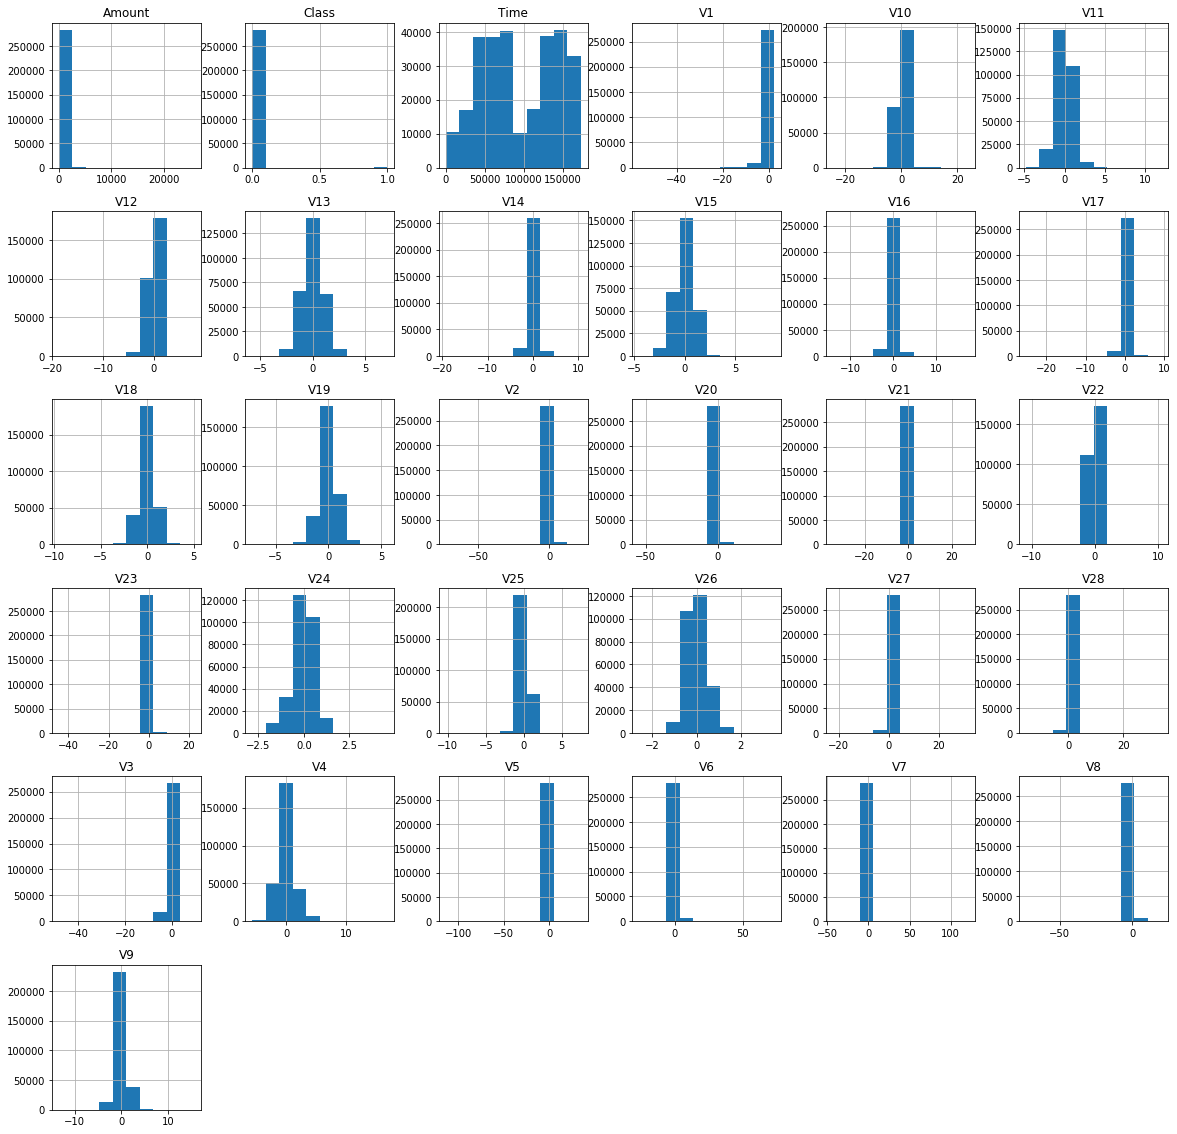

In [9]:
## Histogram of all columns
df.hist(figsize=(20,20))
plt.show()

In [10]:
imbalance = len(fraud)/float(len(genuine))
print('The percentage of imbalance in data : {}'.format((100*len(fraud)/float(len(genuine)))))

The percentage of imbalance in data : 0.17304750013189596


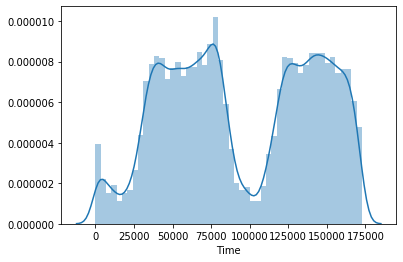

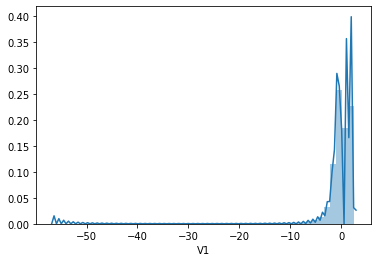

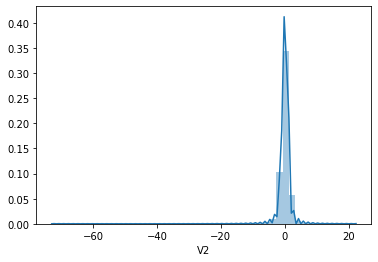

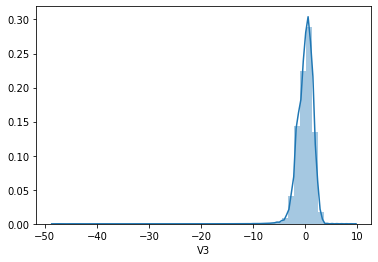

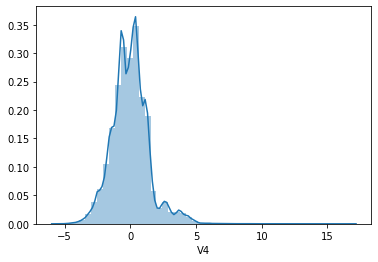

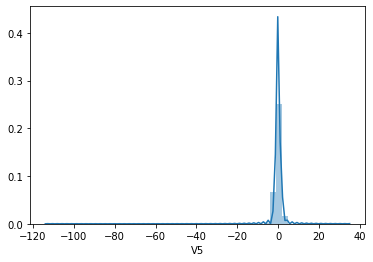

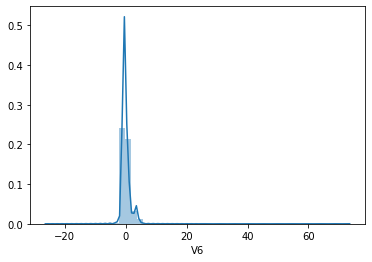

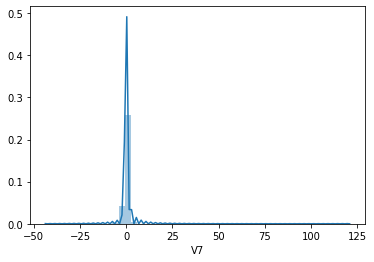

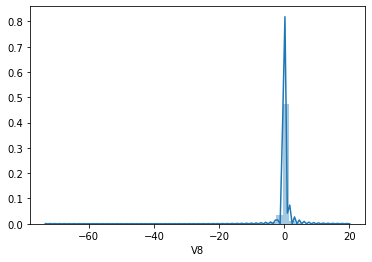

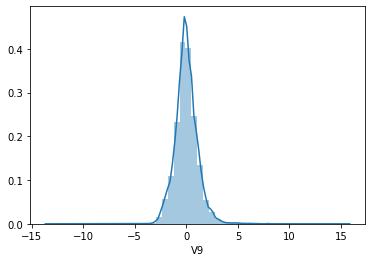

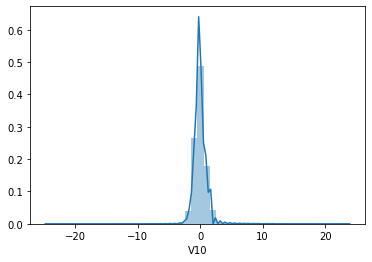

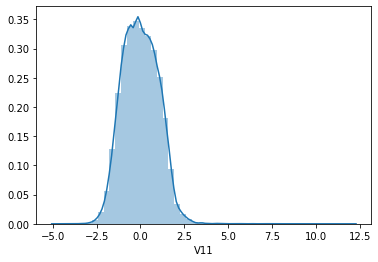

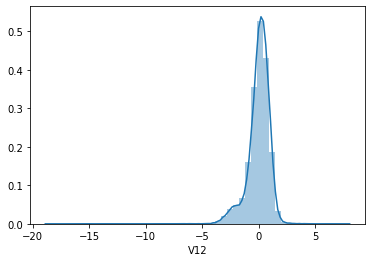

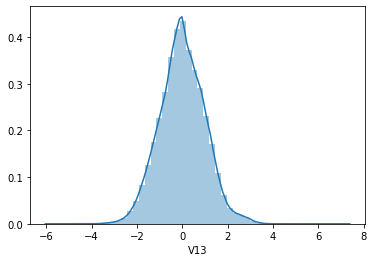

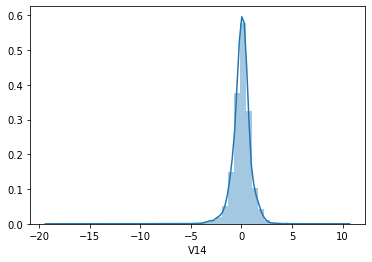

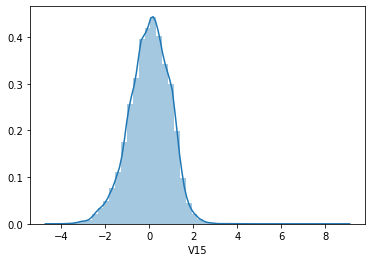

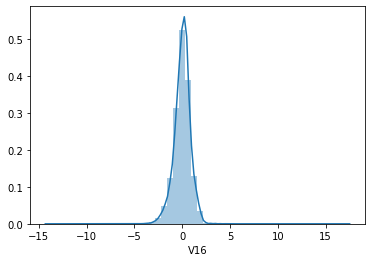

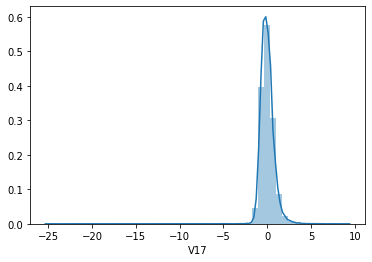

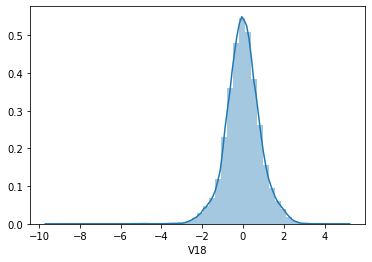

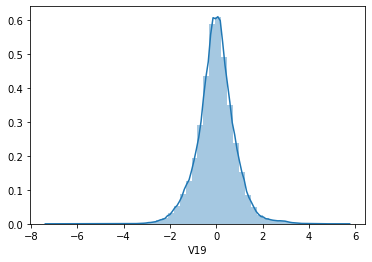

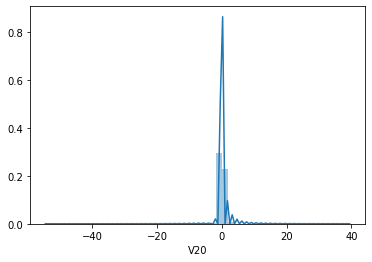

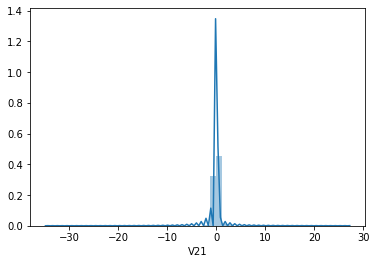

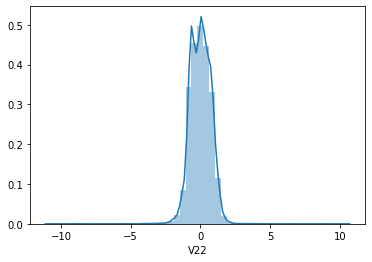

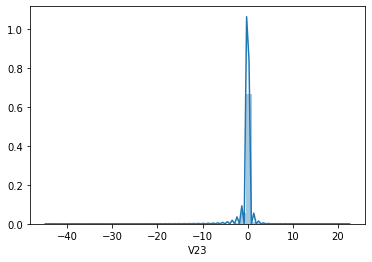

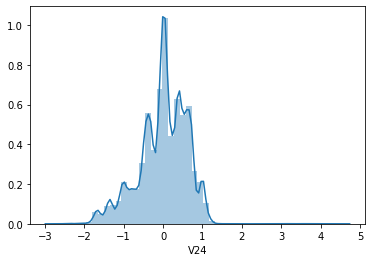

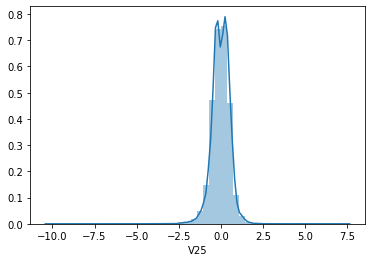

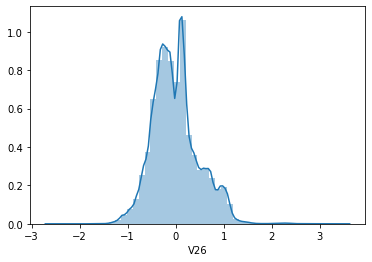

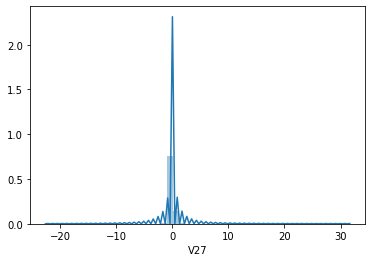

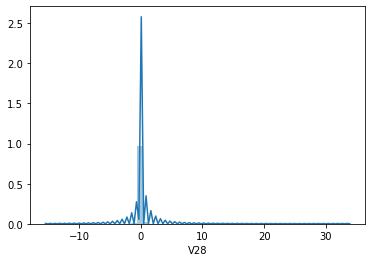

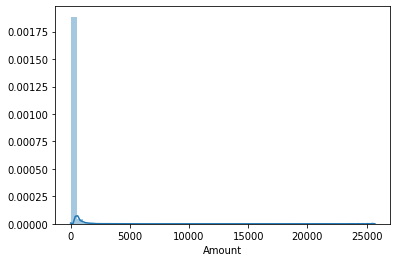

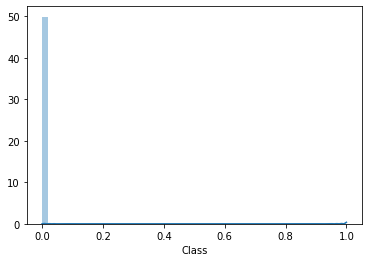

In [11]:
def distgraph(x):
  for i in df.columns:
    sns.distplot(x[i])
    plt.show()

distgraph(df)

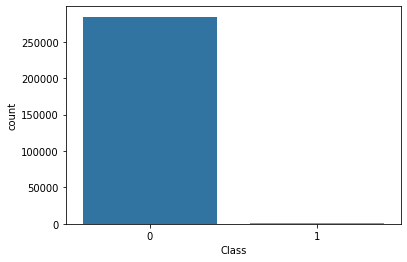

In [12]:
sns.countplot(x='Class',data=df)

The data is highly imbalanced, hence we have to apply some techniques to sample them , also the data is skewed, hence we have to apply power transformation method also to make it good enough for modelling

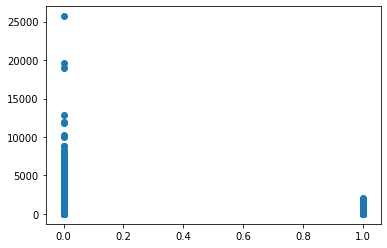

In [13]:
plt.scatter(df['Class'],df['Amount'])
plt.show()

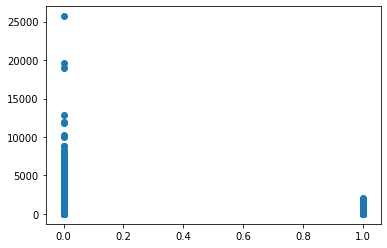

In [14]:
plt.scatter(df['Class'],df['Amount'])
plt.show()

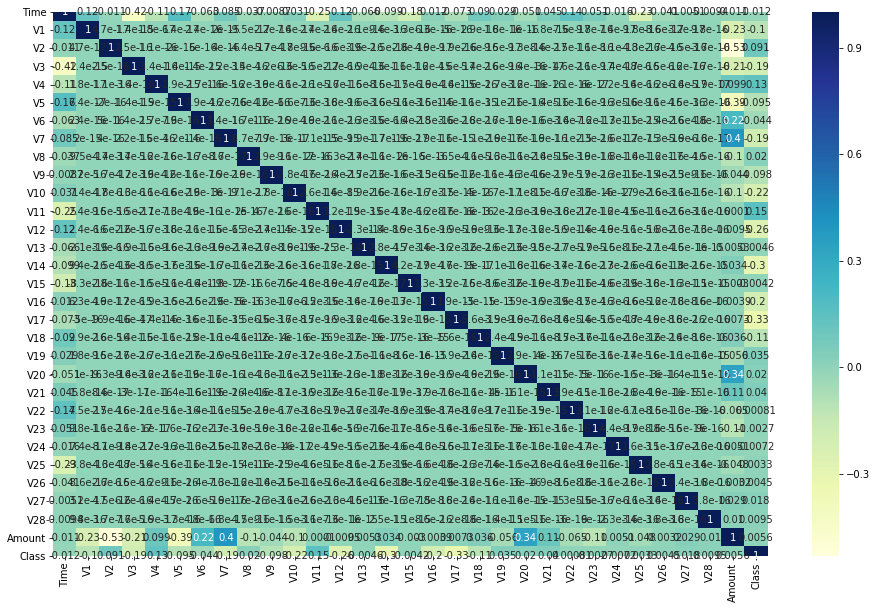

In [15]:
#correlation 
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

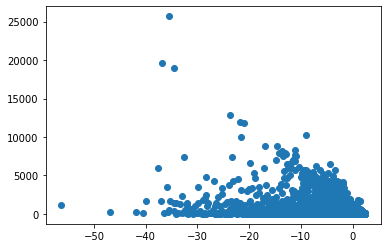

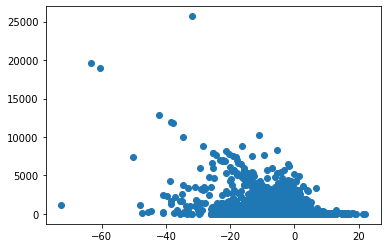

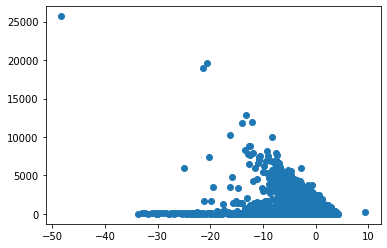

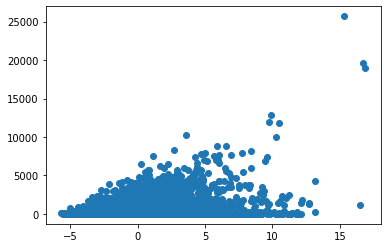

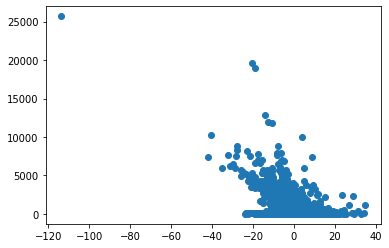

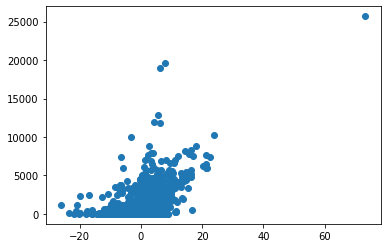

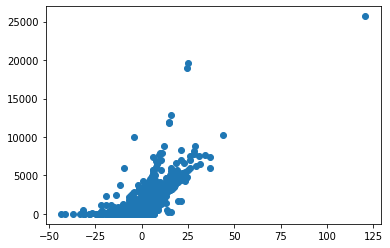

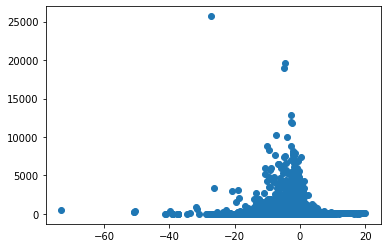

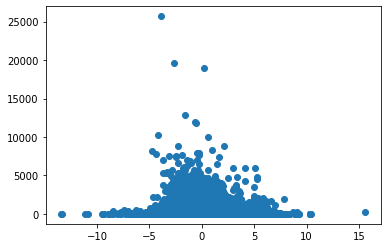

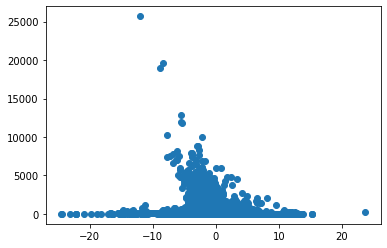

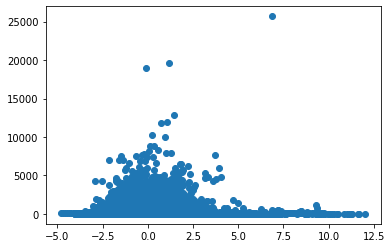

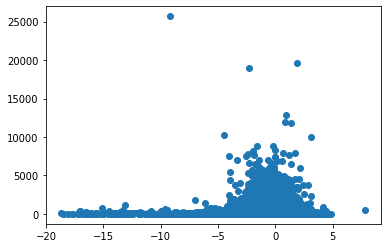

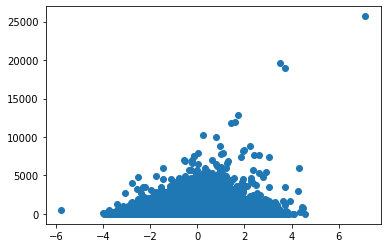

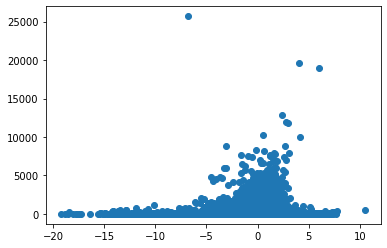

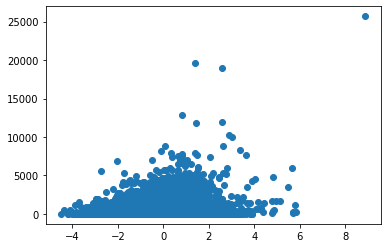

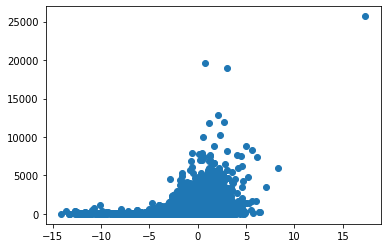

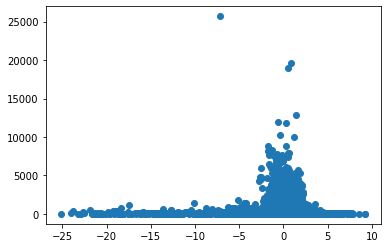

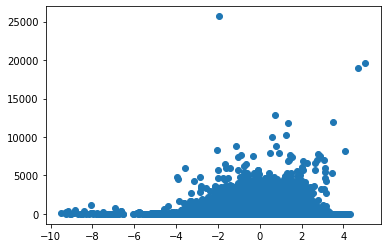

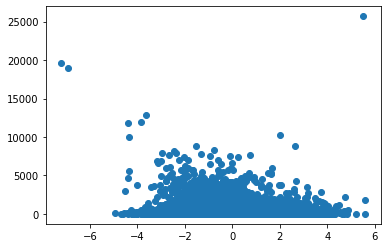

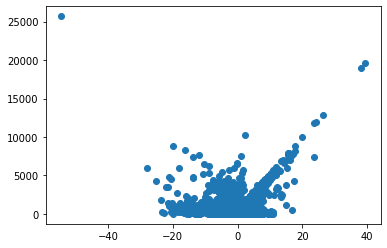

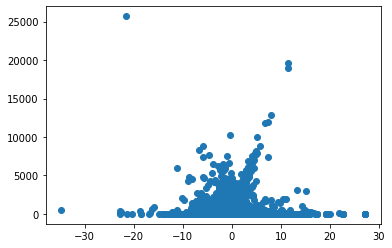

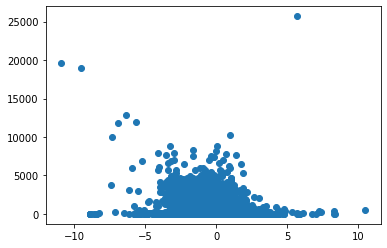

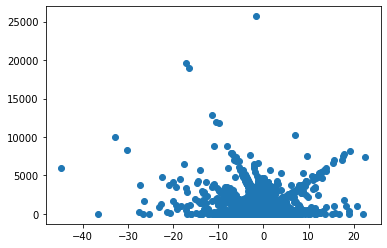

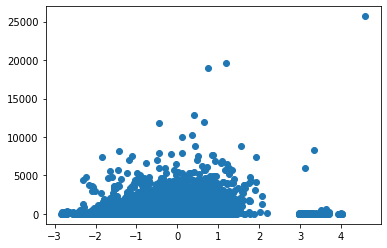

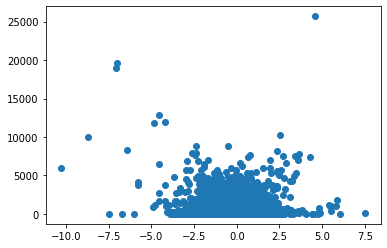

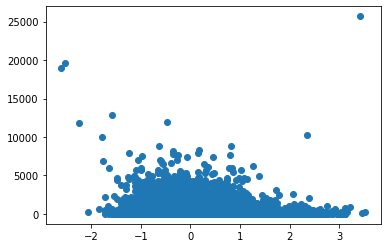

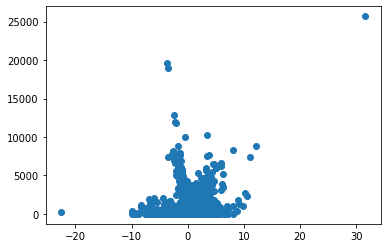

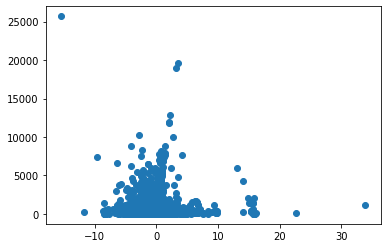

In [16]:
col=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
def scat(x):
  for i in col:
    plt.scatter(x[i],x['Amount'])
    plt.show()

scat(df)

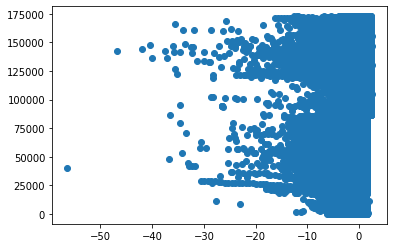

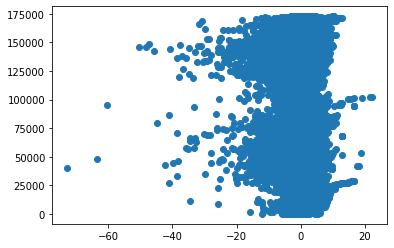

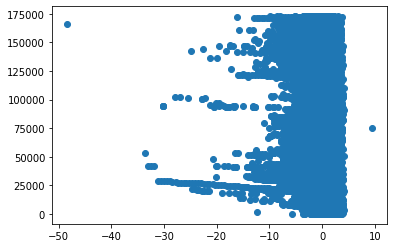

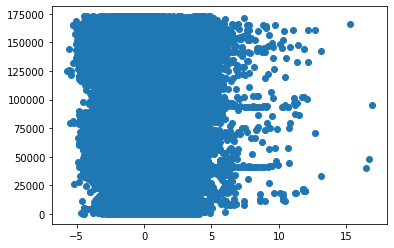

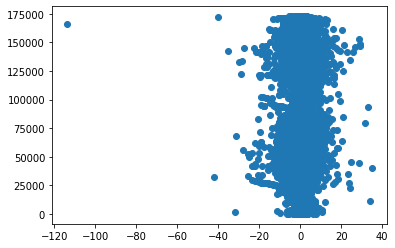

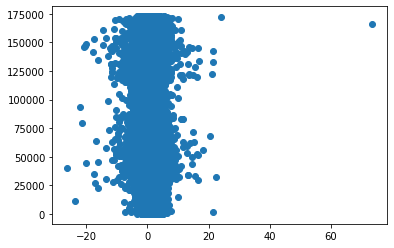

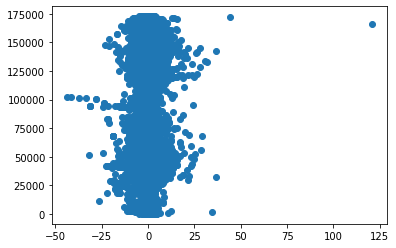

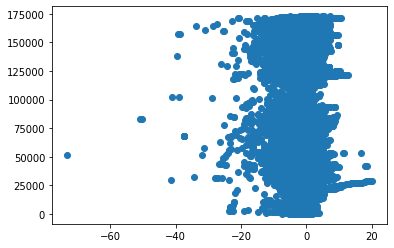

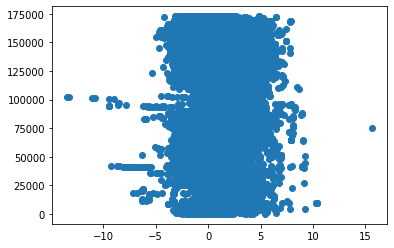

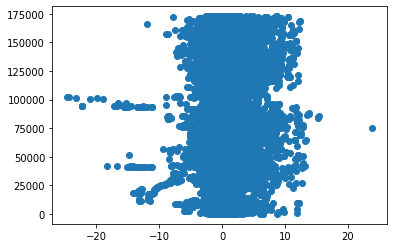

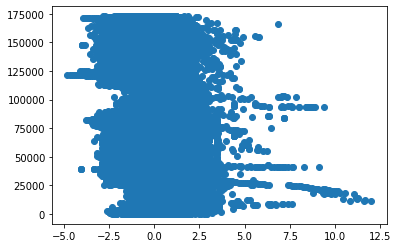

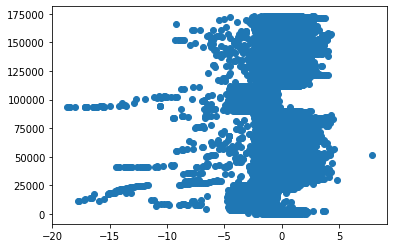

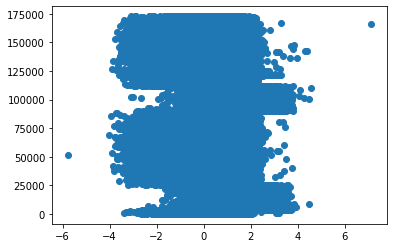

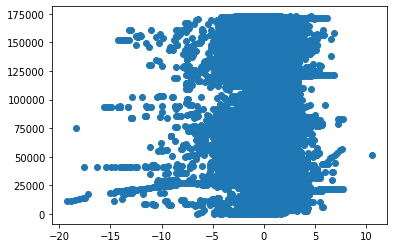

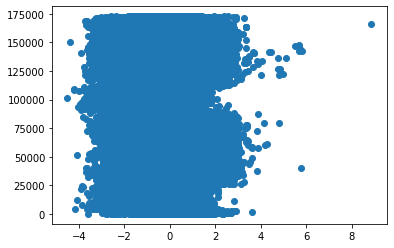

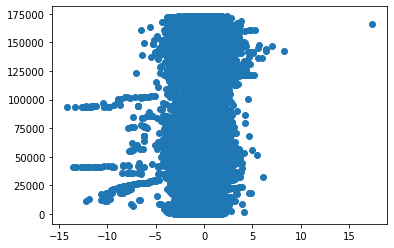

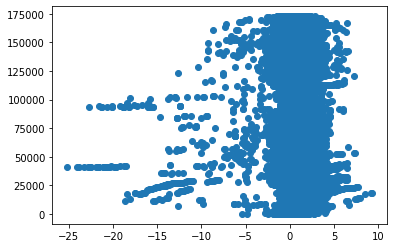

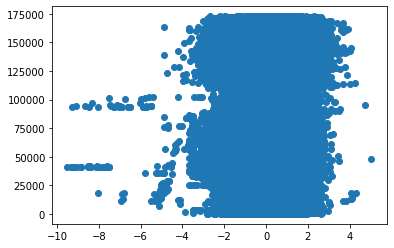

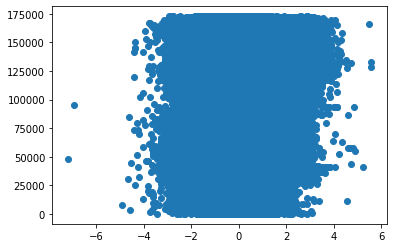

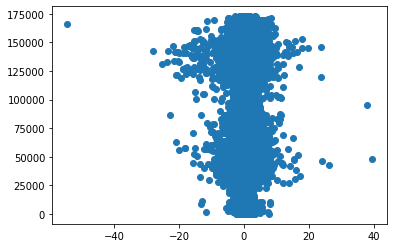

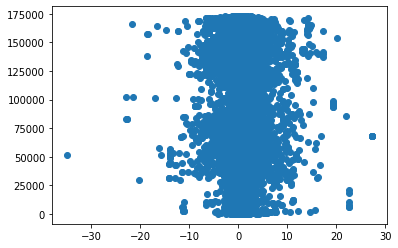

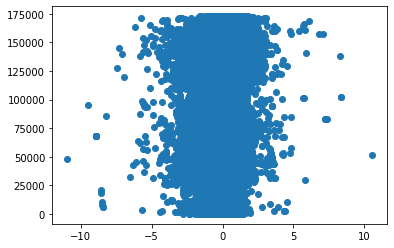

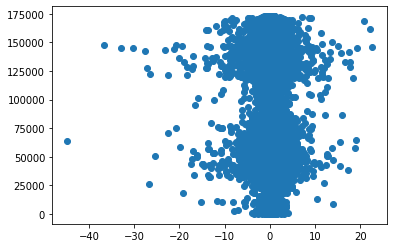

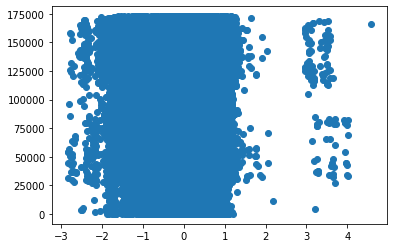

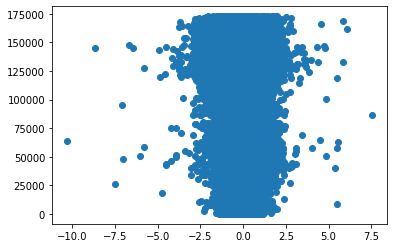

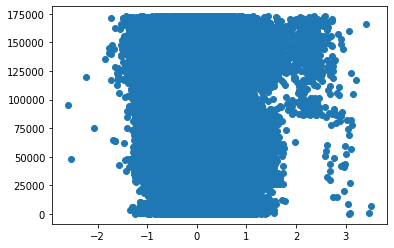

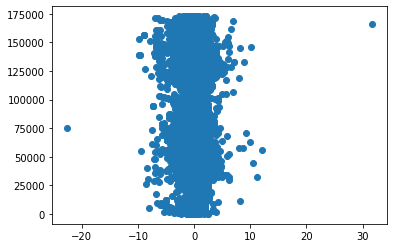

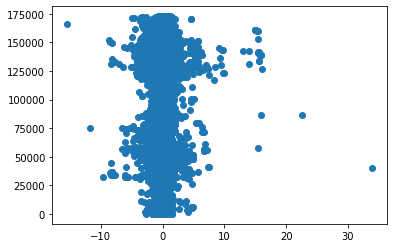

In [17]:
def scat(x):
  for i in col:
    plt.scatter(x[i],x['Time'])
    plt.show()

scat(df)

## Preprocessing and avoiding skewness

In [18]:
#Let us normalize the column Amount
scaler = StandardScaler()
df['Amount_Std'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [19]:
#Dropping Amount and Time from the dataframe
df = df.drop(['Amount'],axis=1)

In [20]:
#y would be carrying the dependent variable
y = df['Class']
X = df.drop(['Class'],axis=1)

In [21]:
#Splitting the data in 70:30 ratio
X_train , X_test, y_train , y_test = train_test_split(X, y , stratify=y,test_size=0.3 , random_state = 42)

<Figure size 432x288 with 0 Axes>

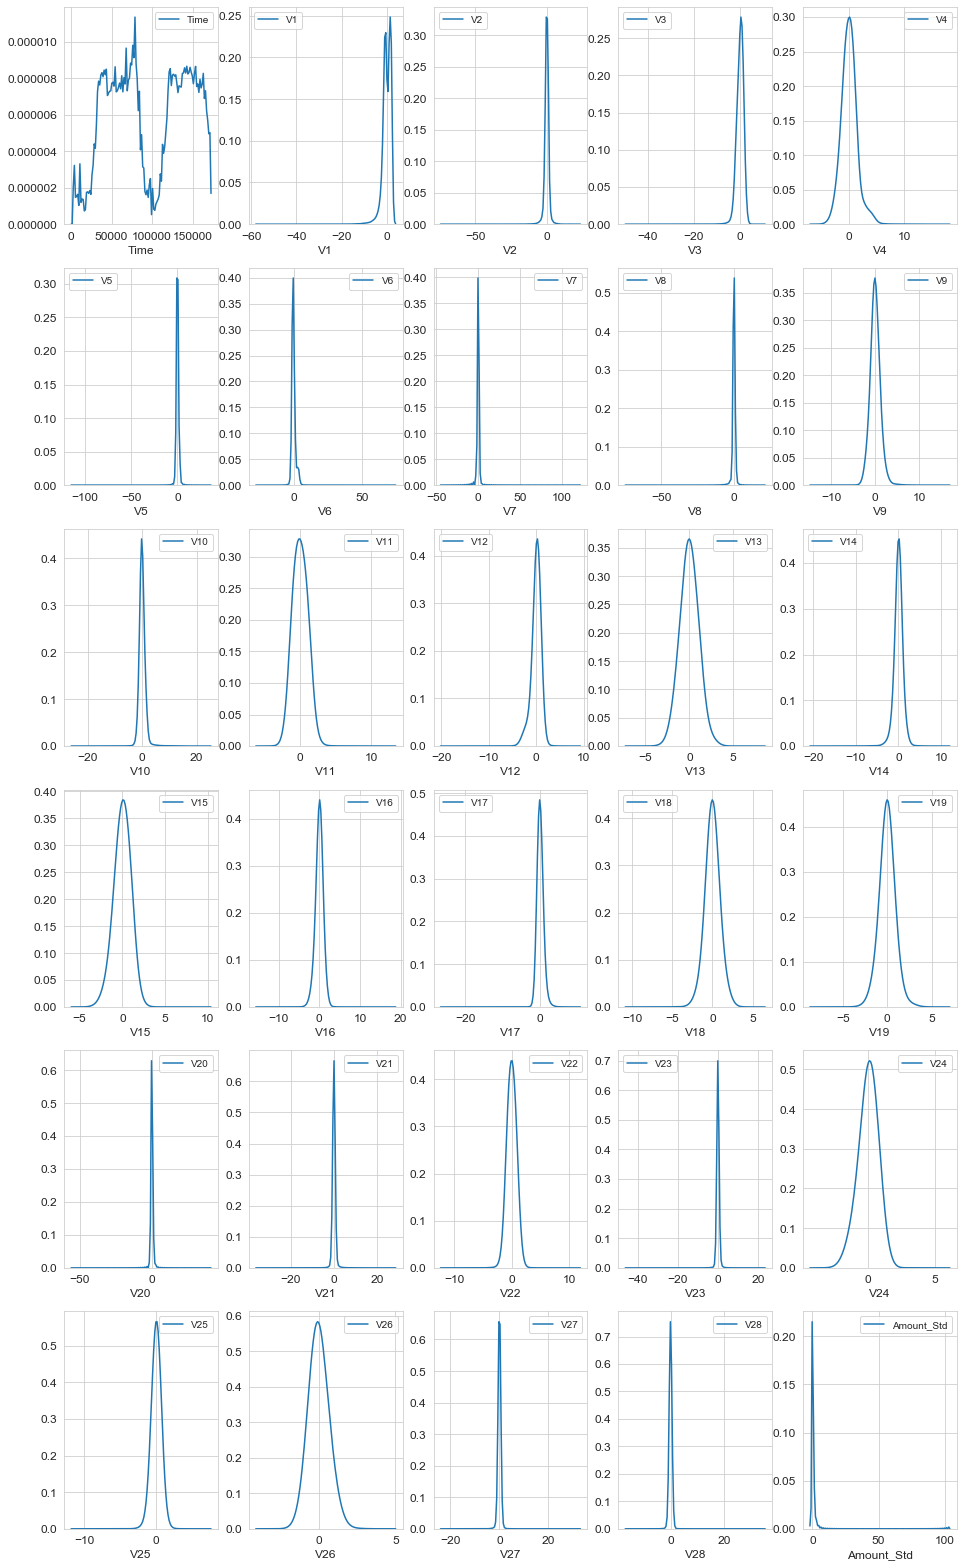

In [22]:
#kde plot to understand skewness
col=X_train.columns
i=0
sns.set_style('whitegrid')
plt.figure()
fig,ax=plt.subplots(8,4,figsize=(16,28))
for item in col:
    i+=1
    plt.subplot(6,5,i)
    sns.kdeplot(X_train[item],bw=0.5)
    plt.xlabel(item,fontsize=12)
    locs,label=plt.xticks()
    plt.tick_params(axis='both',which='major',labelsize=12)
plt.show()

In [23]:
#Implementing Power transformer to X_train to make the distribution of the features more gaussian
pt = PowerTransformer(copy=False)
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
cols=X.columns.values
#Converting the array like structure to dataframe
X_train_pt = pd.DataFrame(X_train_pt,columns=cols)

<Figure size 432x288 with 0 Axes>

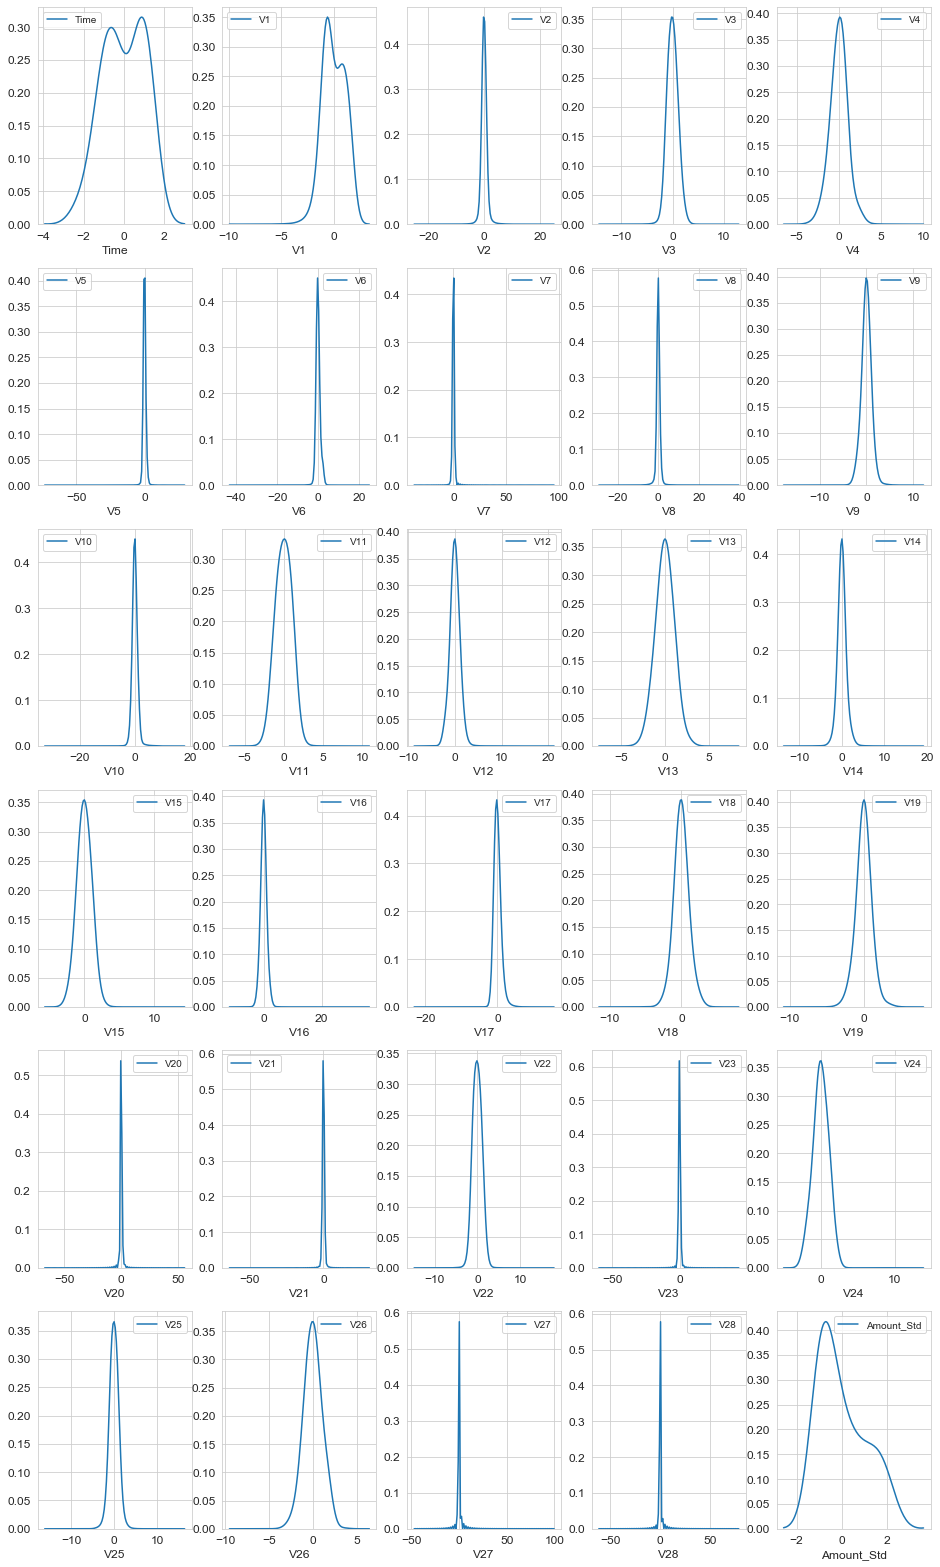

In [24]:
col=X_train_pt.columns
i=0
sns.set_style('whitegrid')
plt.figure()
fig,ax=plt.subplots(8,4,figsize=(16,28))
for item in col:
    i+=1
    plt.subplot(6,5,i)
    sns.kdeplot(X_train_pt[item],bw=0.5)
    plt.xlabel(item,fontsize=12)
    locs,label=plt.xticks()
    plt.tick_params(axis='both',which='major',labelsize=12)
plt.show()

<Figure size 432x288 with 0 Axes>

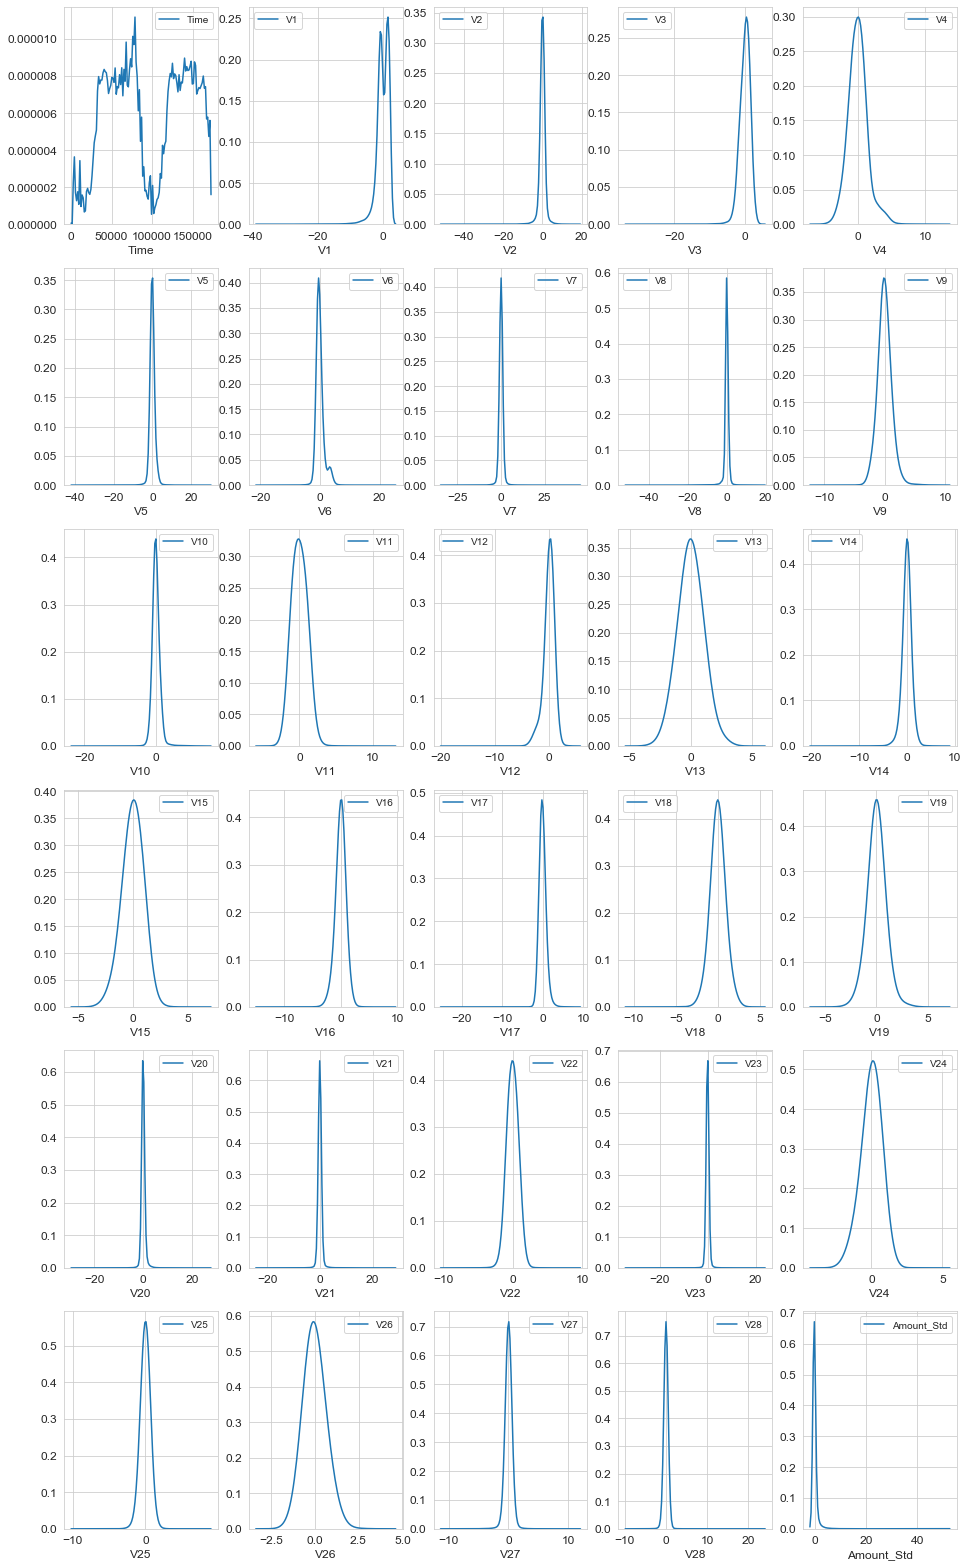

In [25]:
col=X_test.columns
i=0
sns.set_style('whitegrid')
plt.figure()
fig,ax=plt.subplots(8,4,figsize=(16,28))
for item in col:
    i+=1
    plt.subplot(6,5,i)
    sns.kdeplot(X_test[item],bw=0.5)
    plt.xlabel(item,fontsize=12)
    locs,label=plt.xticks()
    plt.tick_params(axis='both',which='major',labelsize=12)
plt.show()

In [26]:
#Implementing Power transformer to X_train to make the distribution of the features more gaussian
pt = PowerTransformer(copy=False)
pt.fit(X_test)
X_test_pt = pt.transform(X_test)
cols=X.columns.values
#Converting the array like structure to dataframe
X_test_pt = pd.DataFrame(X_test_pt,columns=cols)

<Figure size 432x288 with 0 Axes>

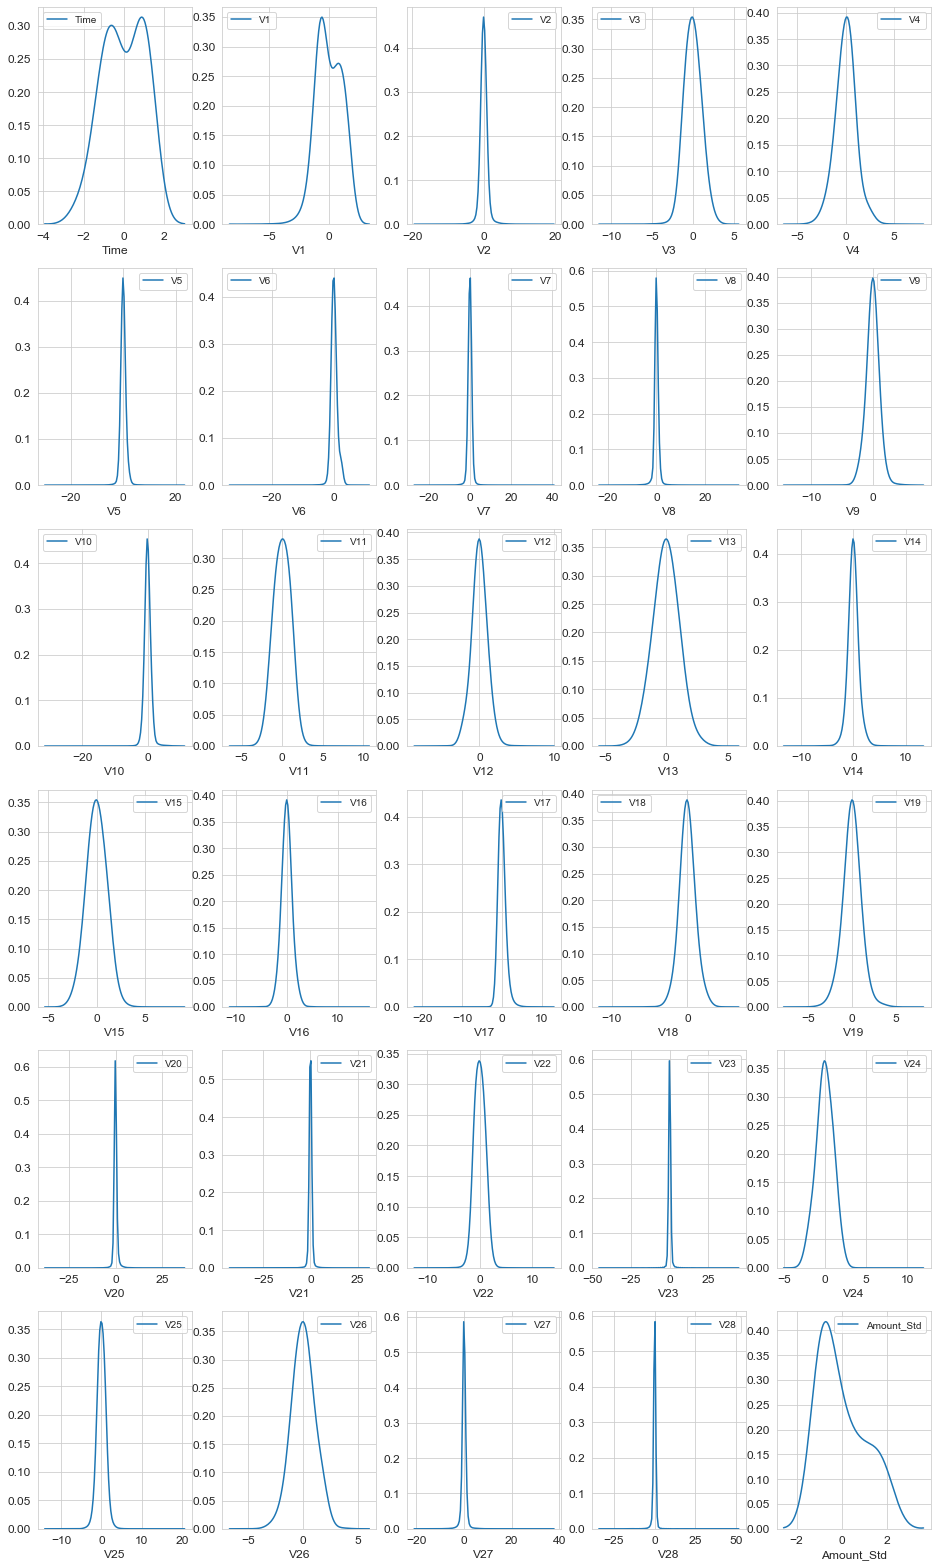

In [27]:
col=X_test_pt.columns
i=0
sns.set_style('whitegrid')
plt.figure()
fig,ax=plt.subplots(8,4,figsize=(16,28))
for item in col:
    i+=1
    plt.subplot(6,5,i)
    sns.kdeplot(X_test_pt[item],bw=0.5)
    plt.xlabel(item,fontsize=12)
    locs,label=plt.xticks()
    plt.tick_params(axis='both',which='major',labelsize=12)
plt.show()

### Modelling
Following are to be followed



a.logistic regression

b.decision tree

c.random forest

d.XG Boost

Random Undersampling near miss
Randomised search CV
a.logistic regression

b.decision tree

c.random forest

d.XG Boost

## Hyper parameter Tuning

## Smote
a.logistic regression

b.decision tree

c.random forest

d.XG Boost

## Adasyn
a.logistic regression

b.decision tree

c.random forest

d.XG Boost

## Model Building
## Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.63      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test data 99.9%
ROC for the test data 81.4%


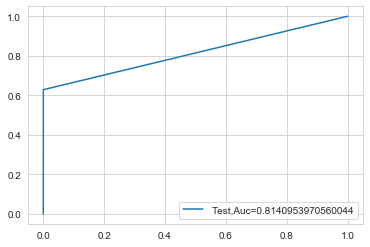

[[85279    16]
 [   55    93]]


In [28]:
logreg=LogisticRegression()
model_logreg=logreg.fit(X_train_pt,y_train)
#lets analyse parameters of the model
pred_im_logreg=model_logreg.predict(X_test_pt)
prediction_prob_logreg=model_logreg.predict_proba(X_test_pt)[:,1]
cnf_im_logreg=metrics.confusion_matrix(y_test,pred_im_logreg)
print(classification_report(y_test,pred_im_logreg))
accuracy=metrics.accuracy_score(y_test,pred_im_logreg)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_im_logreg)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_im_logreg)

## Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.66      0.70       148

    accuracy                           1.00     85443
   macro avg       0.87      0.83      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test data 99.9%
ROC for the test data 82.8%


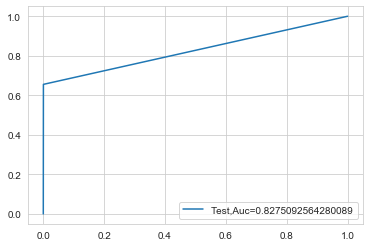

[[85262    33]
 [   51    97]]


In [29]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(X_train_pt,y_train)
pred_im_dt=dt.predict(X_test_pt)
cnf_im_dt=metrics.confusion_matrix(y_test,pred_im_dt)
print(classification_report(y_test,pred_im_dt))
accuracy=metrics.accuracy_score(y_test,pred_im_dt)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_im_dt)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_im_dt)

## Random Forest

[[85290     5]
 [   36   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test data 100.0%
ROC for the test data 87.8%


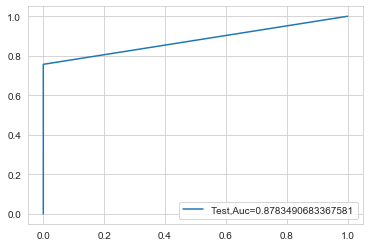

In [30]:
rf=RandomForestClassifier()
model_rf=rf.fit(X_train_pt,y_train)
pred_im_rf=rf.predict(X_test_pt)
cnf_matrix_im_rf=metrics.confusion_matrix(y_test,pred_im_rf)
print(cnf_matrix_im_rf)
print(classification_report(y_test,pred_im_rf))
accuracy=metrics.accuracy_score(y_test,pred_im_rf)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_im_rf)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()

## XG BOOST

[[85288     7]
 [   34   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.77      0.85       148

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test data 100.0%
ROC for the test data 88.5%


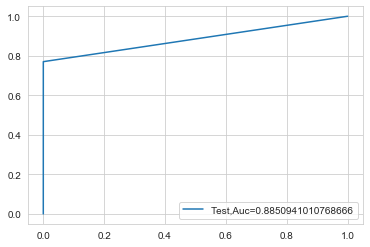

In [31]:
xg=xgb.XGBClassifier()
xg_model=xg.fit(X_train_pt,y_train)
pred_im_xg=xg.predict(X_test_pt)
print(metrics.confusion_matrix(y_test,pred_im_xg))
print(classification_report(y_test,pred_im_xg))
print("Accuracy for the test data","{:.1%}".format(metrics.accuracy_score(y_test,pred_im_xg)))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_im_xg)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data","{:.1%}".format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [32]:
## Under sampling

In [33]:
nr = NearMiss(version=1) 
  
X_train_ru, y_train_ru = nr.fit_sample(X_train_pt, y_train) 

In [34]:
X_train_ru.shape

(688, 30)

In [35]:
y_train_ru.shape

(688,)

In [36]:
print("After Undersampling, counts of label '1': {}".format(sum(y_train_ru == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_ru == 0)))

After Undersampling, counts of label '1': 344
After Undersampling, counts of label '0': 344


In [37]:
print(sum(y_train_ru == 1))
print(sum(y_train_ru == 0))

344
344


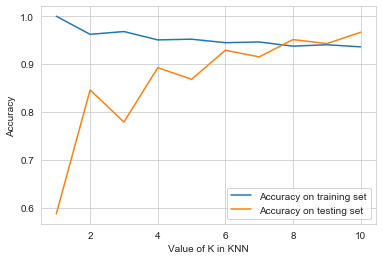

In [38]:
k_range = range(1, 11)
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ru,y_train_ru)
    score1.append(knn.score(X_train_ru,y_train_ru))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

[[79247  6048]
 [   19   129]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85295
           1       0.02      0.87      0.04       148

    accuracy                           0.93     85443
   macro avg       0.51      0.90      0.50     85443
weighted avg       1.00      0.93      0.96     85443

Accuracy for the test data 92.9%
ROC for the test data 90.0%


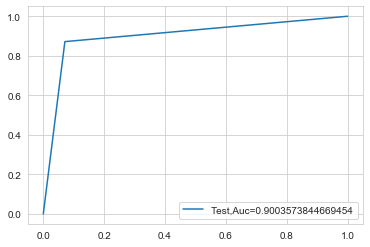

In [39]:
knn=KNeighborsClassifier(n_neighbors=6)
model_knn=knn.fit(X_train_ru,y_train_ru)
pred_knn=knn.predict(X_test)
cnf_matrix_knn=metrics.confusion_matrix(y_test,pred_knn)
print(cnf_matrix_knn)
print(classification_report(y_test,pred_knn))
accuracy=metrics.accuracy_score(y_test,pred_knn)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_knn)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()


In [40]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_pt, y_train)

In [41]:
X_res.shape

(688, 30)

In [42]:
y_res.shape

(688,)

In [43]:
print("After Undersampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_res == 0)))

After Undersampling, counts of label '1': 344
After Undersampling, counts of label '0': 344


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Accuracy for the test data 97.4%
ROC for the test data 92.6%


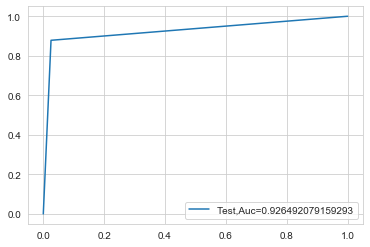

[[83129  2166]
 [   18   130]]


In [44]:
logreg=LogisticRegression()
model_logreg=logreg.fit(X_res,y_res)
#lets analyse parameters of the model
pred_logreg=model_logreg.predict(X_test_pt)
prediction_prob_logreg=model_logreg.predict_proba(X_test_pt)[:,1]
cnf_logreg=metrics.confusion_matrix(y_test,pred_logreg)
print(classification_report(y_test,pred_logreg))
accuracy=metrics.accuracy_score(y_test,pred_logreg)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_logreg)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_logreg)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     85295
           1       0.01      0.91      0.03       148

    accuracy                           0.88     85443
   macro avg       0.51      0.89      0.48     85443
weighted avg       1.00      0.88      0.93     85443

Accuracy for the test data 88.1%
ROC for the test data 89.3%


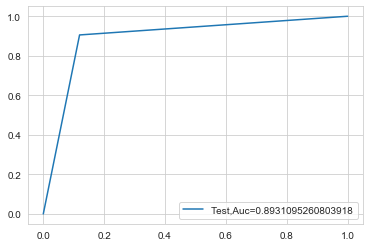

[[75129 10166]
 [   14   134]]


In [45]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(X_res,y_res)
pred_dt=dt.predict(X_test_pt)
cnf_dt=metrics.confusion_matrix(y_test,pred_dt)
print(classification_report(y_test,pred_dt))
accuracy=metrics.accuracy_score(y_test,pred_dt)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_dt)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_dt)

In [46]:
#Stratified K fold for cross validation 
strat=StratifiedKFold(n_splits=5,random_state=42,shuffle=False)

### Hyper parameter tuning

#### Logistic Regression

In [47]:
#grid
dual=[True,False]
max_iter=[100,110,120,130,140]
C=[1.0,1.5,2.0,2.5]
param_grid=dict(dual=dual,max_iter=max_iter,C=C)
lr_ru=LogisticRegression(penalty='l2')

In [48]:
#RandomisedSearchCV
random_lr_ru=RandomizedSearchCV(estimator=lr_ru,param_distributions=param_grid,cv=strat,n_jobs=-1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.89      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Accuracy for the test data 97.0%
ROC for the test data 92.7%


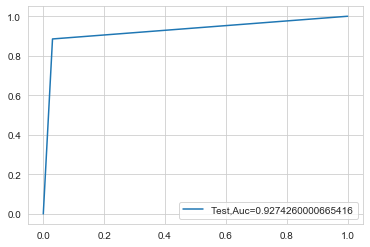

[[82712  2583]
 [   17   131]]


In [49]:
#Fitting the train data
random_lr_ru = random_lr_ru.fit(X_res, y_res)
model_param_lr_ru = random_lr_ru.best_params_
#Fitting the model on train data with the best param values
lr_final_ru = LogisticRegression(penalty='l2',dual=model_param_lr_ru['dual'],C=model_param_lr_ru['C'],
                                 max_iter=model_param_lr_ru['max_iter'])
##Fitting the model on train data with the best param values
lr_final_ru = lr_final_ru.fit(X_res, y_res)
#Predicting value on test data
pred_lr_ru =lr_final_ru.predict(X_test_pt)
cnf_lr_ru=metrics.confusion_matrix(y_test,pred_lr_ru)
print(classification_report(y_test,pred_lr_ru))
accuracy=metrics.accuracy_score(y_test,pred_lr_ru)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_lr_ru)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_lr_ru)

## Decision Trees

In [50]:
#grid for decision trees

param_dist ={
'max_depth': [3, 4,5, 6],
'min_samples_leaf': randint(1,9),
'criterion' : ['gini','entropy']}

In [51]:
#Instantiating the decision Tree Model and Instantiating the RandomizedSearchCV object
dt_ru = DecisionTreeClassifier()
random_dt_ru = RandomizedSearchCV(dt_ru,param_dist,cv=strat,random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.87      0.06       148

    accuracy                           0.95     85443
   macro avg       0.52      0.91      0.52     85443
weighted avg       1.00      0.95      0.97     85443

Accuracy for the test data 95.3%
ROC for the test data 91.2%


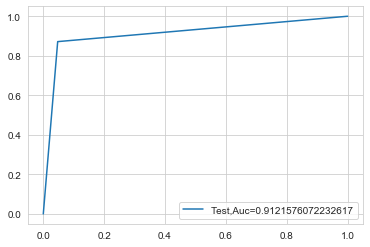

[[81260  4035]
 [   19   129]]


In [52]:
#Fitting the data based on RandomizedSearchCV parameters
random_dt_ru = random_dt_ru.fit(X_res, y_res)
model_param_dt_ru=random_dt_ru.best_params_
#Fitting the data on the best hyperparameter values fetched by RandomizedSearchCV
dt_final_ru = DecisionTreeClassifier(criterion=model_param_dt_ru['criterion'],max_depth= model_param_dt_ru['max_depth'],
                                     min_samples_leaf=model_param_dt_ru['min_samples_leaf'],random_state=42)
#Fitting the data on the best hyperparameter values fetched by RandomizedSearchCV
dt_final_ru = dt_final_ru.fit(X_res,y_res)
#Predicting the values on test data
pred_dt_ru = dt_final_ru.predict(X_test_pt)
cnf_dt_ru=metrics.confusion_matrix(y_test,pred_dt_ru)
print(classification_report(y_test,pred_dt_ru))
accuracy=metrics.accuracy_score(y_test,pred_dt_ru)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_dt_ru)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_dt_ru)

### Random Forest with hyperparameter tuning


In [53]:
#Creating the param distribution grid to be passed in RandomizedSearchCV
param_grid = {
    'max_depth': [3,20,50],
    'min_samples_leaf': [2,6,8],
    'min_samples_split': [2,6,8],
    'n_estimators': [10,100, 200], 
    'max_features': ['auto','sqrt','log2'],
    'bootstrap' : [True,False]
    }

In [54]:
#Instantiating the RandomForestClassifier model
rf_ru = RandomForestClassifier(random_state=42)

In [55]:
#Instantiating the RandomizedSearchCV object
random_rf_ru = RandomizedSearchCV(estimator = rf_ru, param_distributions = param_grid, 
                          cv = strat, n_jobs = -1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.88      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy for the test data 98.2%
ROC for the test data 93.0%


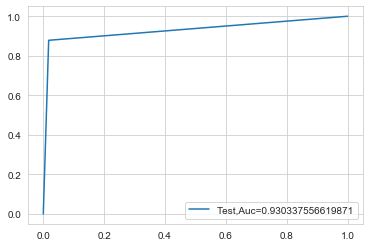

[[83785  1510]
 [   18   130]]


In [56]:
#Fitting the model in the train dataset
random_rf_ru = random_rf_ru.fit(X_res,y_res)
model_param_rf_ru = random_rf_ru.best_params_
#Instantiating the RandomForestClassifier Model with the best hyperparameters having the best values
rf_final_ru = RandomForestClassifier(n_estimators= model_param_rf_ru['n_estimators'], min_samples_split= model_param_rf_ru['min_samples_split'],min_samples_leaf= model_param_rf_ru['min_samples_leaf'],
                                     max_features=model_param_rf_ru['max_features'], max_depth= model_param_rf_ru['max_depth'],
                                     bootstrap=model_param_rf_ru['bootstrap'],random_state=42)
#Fitting the model on train data set
rf_final_ru =rf_final_ru.fit(X_res, y_res)
#Predicting the values on test data set
pred_rf_ru =rf_final_ru.predict(X_test_pt)
cnf_rf_ru=metrics.confusion_matrix(y_test,pred_rf_ru)
print(classification_report(y_test,pred_rf_ru))
accuracy=metrics.accuracy_score(y_test,pred_rf_ru)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_rf_ru)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_rf_ru)

## XGBoost 

In [57]:
#Instantiating the parameters to be passed in param_distributions in RandomizedSearchCV
param_grid = {
 "learning_rate"    : [0.01, 0.1, 0.2, 0.3] ,
 "max_depth"        : [ 3, 4, 6, 8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [58]:
#Instantiating the XGBClassifier Model
xg_ru = xgb.XGBClassifier()
random_xg_ru = RandomizedSearchCV(xg_ru,param_distributions=param_grid,cv=strat,n_jobs=-1,refit=True,random_state=42)

In [59]:
X_test_xg = X_test_pt.values

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.88      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Accuracy for the test data 96.6%
ROC for the test data 92.2%


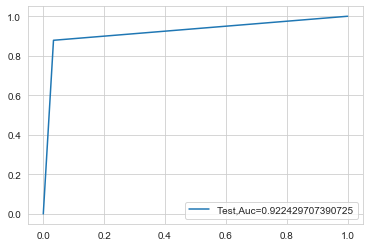

[[82436  2859]
 [   18   130]]


In [60]:
#Fitting the model in the train dataset
random_xg_ru = random_xg_ru.fit(X_res,y_res)
model_param_xg_ru = random_xg_ru.best_params_
#Instantiating the XGBoostClassifier Model with the best hyperparameters having the best values
xg_final_ru = xgb.XGBClassifier(min_child_weight=model_param_xg_ru['min_child_weight'] ,
                                max_depth=model_param_xg_ru['max_depth'], learning_rate=model_param_xg_ru['learning_rate'],
                                gamma=model_param_xg_ru['gamma'],colsample_bytree=model_param_xg_ru['colsample_bytree'],
                                random_state=42)
#Fitting the model on train data set
xg_final_ru =xg_final_ru.fit(X_res, y_res)
#Predicting the values on test data set
pred_xg_ru =xg_final_ru.predict(X_test_pt)
cnf_xg_ru=metrics.confusion_matrix(y_test,pred_xg_ru)
print(classification_report(y_test,pred_xg_ru))
accuracy=metrics.accuracy_score(y_test,pred_xg_ru)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_xg_ru)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_xg_ru)

## SMOTE

In [61]:
#Instiating SMOTE oversampling method and fitting X_train and y_train dataset
sm = SMOTE(random_state = 42) 
X_train_sm, y_train_sm = sm.fit_sample(X_train_pt, y_train) 

In [62]:
#Printing the number of records of each class is present in Y train dataset
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

After OverSampling, the shape of train_X: (398040, 30)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1': 199020
After OverSampling, counts of label '0': 199020


### Logistic Regression

In [63]:
#grid
dual=[True,False]
max_iter=[100,110,120,130,140]
C=[1.0,1.5,2.0,2.5]
param_grid=dict(dual=dual,max_iter=max_iter,C=C)
lr_sm=LogisticRegression(penalty='l2')

In [64]:
#RandomisedSearchCV
random_lr_sm=RandomizedSearchCV(estimator=lr_sm,param_distributions=param_grid,cv=strat,n_jobs=-1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.87      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Accuracy for the test data 97.5%
ROC for the test data 92.3%


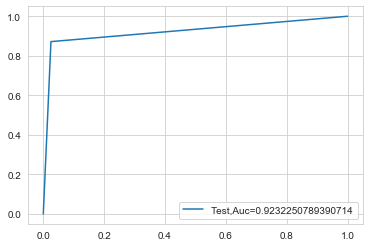

[[83148  2147]
 [   19   129]]


In [65]:

#Fitting the train data
random_lr_sm = random_lr_sm.fit(X_train_sm, y_train_sm)
model_param_lr_sm = random_lr_sm.best_params_
#Fitting the model on train data with the best param values
lr_final_sm = LogisticRegression(penalty='l2',dual=model_param_lr_sm['dual'],C=model_param_lr_sm['C'],
                                 max_iter=model_param_lr_sm['max_iter'])
##Fitting the model on train data with the best param values
lr_final_sm = lr_final_sm.fit(X_train_sm, y_train_sm)
#Predicting value on test data
pred_lr_sm =lr_final_sm.predict(X_test_pt)
cnf_lr_sm=metrics.confusion_matrix(y_test,pred_lr_sm)
print(classification_report(y_test,pred_lr_sm))
accuracy=metrics.accuracy_score(y_test,pred_lr_sm)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_lr_sm)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_lr_sm)

## Decision Trees

In [66]:
#grid for decision trees
param_dist ={
'max_depth': [3, 4,5, 6],
'min_samples_leaf': randint(1,9),
'criterion' : ['gini','entropy']}

In [67]:
#Instantiating the decision Tree Model and Instantiating the RandomizedSearchCV object
dt_sm = DecisionTreeClassifier()
random_dt_sm = RandomizedSearchCV(dt_sm,param_dist,cv=strat,random_state=42)


In [68]:

#Fitting the data based on RandomizedSearchCV parameters
random_dt_sm = random_dt_sm.fit(X_train_sm, y_train_sm)
model_param_dt_sm=random_dt_sm.best_params_


In [69]:
#Fitting the data on the best hyperparameter values fetched by RandomizedSearchCV
dt_final_sm = DecisionTreeClassifier(criterion=model_param_dt_sm['criterion'],max_depth= model_param_dt_sm['max_depth'],
                                     min_samples_leaf=model_param_dt_sm['min_samples_leaf'],random_state=42)


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.84      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.90      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Accuracy for the test data 97.1%
ROC for the test data 90.5%


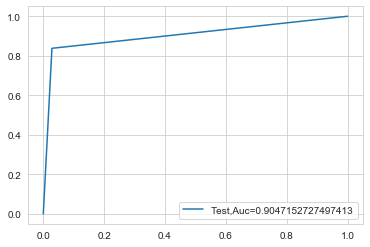

[[82872  2423]
 [   24   124]]


In [70]:
#Fitting the data on the best hyperparameter values fetched by RandomizedSearchCV
dt_final_sm = dt_final_sm.fit(X_train_sm, y_train_sm)
#Predicting the values on test data
pred_dt_sm = dt_final_sm.predict(X_test_pt)
cnf_dt_sm=metrics.confusion_matrix(y_test,pred_dt_sm)
print(classification_report(y_test,pred_dt_sm))
accuracy=metrics.accuracy_score(y_test,pred_dt_sm)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_dt_sm)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_dt_sm)

### Random Forest with hyperparameter tuning

In [71]:
#Creating the param distribution grid to be passed in RandomizedSearchCV
param_grid = {
    'max_depth': [3,20,50],
    'min_samples_leaf': [2,6,8],
    'min_samples_split': [2,6,8],
    'n_estimators': [10,100, 200], 
    'max_features': ['auto','sqrt','log2'],
    'bootstrap' : [True,False]
    }


In [72]:
#Instantiating the RandomForestClassifier model
rf_sm = RandomForestClassifier(random_state=42)

#Instantiating the RandomizedSearchCV object
random_rf_sm = RandomizedSearchCV(estimator = rf_sm, param_distributions = param_grid, 
                          cv = strat, n_jobs = -1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.78      0.80       148

    accuracy                           1.00     85443
   macro avg       0.91      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test data 99.9%
ROC for the test data 88.8%


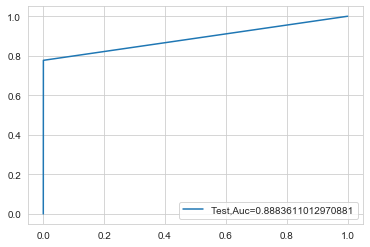

[[85269    26]
 [   33   115]]


In [73]:
#Fitting the model in the train dataset
random_rf_sm = random_rf_sm.fit(X_train_sm, y_train_sm)
model_param_rf_sm = random_rf_sm.best_params_
#Instantiating the RandomForestClassifier Model with the best hyperparameters having the best values
rf_final_sm = RandomForestClassifier(n_estimators= model_param_rf_sm['n_estimators'], min_samples_split=
                                     model_param_rf_sm['min_samples_split'],
                                     min_samples_leaf= model_param_rf_sm['min_samples_leaf'],
                                     max_features=model_param_rf_sm['max_features'], max_depth= model_param_rf_sm['max_depth'],
                                     bootstrap=model_param_rf_sm['bootstrap'],random_state=42)
#Fitting the model on train data set
rf_final_sm =rf_final_sm.fit(X_train_sm, y_train_sm)
#Predicting the values on test data set
pred_rf_sm =rf_final_sm.predict(X_test_pt)
cnf_rf_sm=metrics.confusion_matrix(y_test,pred_rf_sm)
print(classification_report(y_test,pred_rf_sm))
accuracy=metrics.accuracy_score(y_test,pred_rf_sm)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_rf_sm)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_rf_sm)

## XGBoost

In [74]:
#Instantiating the parameters to be passed in param_distributions in RandomizedSearchCV
param_grid = {
 "learning_rate"    : [0.01, 0.1, 0.2, 0.3] ,
 "max_depth"        : [ 3, 4, 6, 8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }


In [75]:
#Instantiating the XGBClassifier Model
xg_sm = xgb.XGBClassifier()
random_xg_sm = RandomizedSearchCV(xg_sm,param_distributions=param_grid,cv=strat,n_jobs=-1,refit=True,random_state=42)


In [76]:
X_test_xg = X_test_pt.values


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.53      0.81      0.64       148

    accuracy                           1.00     85443
   macro avg       0.77      0.90      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test data 99.8%
ROC for the test data 90.5%


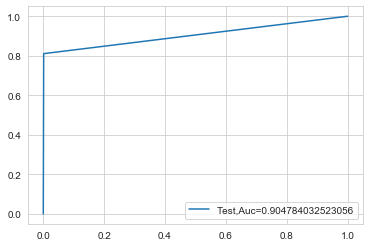

[[85189   106]
 [   28   120]]


In [77]:
#Fitting the model in the train dataset
random_xg_sm = random_xg_sm.fit(X_train_sm, y_train_sm)
model_param_xg_sm = random_xg_sm.best_params_
#Instantiating the XGBoostClassifier Model with the best hyperparameters having the best values
xg_final_sm = xgb.XGBClassifier(min_child_weight=model_param_xg_sm['min_child_weight'] ,
                                max_depth=model_param_xg_sm['max_depth'], learning_rate=model_param_xg_sm['learning_rate'],
                                gamma=model_param_xg_sm['gamma'],colsample_bytree=model_param_xg_sm['colsample_bytree'],
                                random_state=42)
#Fitting the model on train data set
xg_final_sm =xg_final_sm.fit(X_train_sm, y_train_sm)
#Predicting the values on test data set
pred_xg_sm =xg_final_sm.predict(X_test_pt)
cnf_xg_sm=metrics.confusion_matrix(y_test,pred_xg_sm)
print(classification_report(y_test,pred_xg_sm))
accuracy=metrics.accuracy_score(y_test,pred_xg_sm)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_xg_sm)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_xg_sm)
              

## ADASYN

In [78]:
ad=ADASYN(random_state=42)
X_train_ad,y_train_ad=ad.fit_sample(X_train_pt,y_train)

In [79]:
#Printing the count of records of different classed in y_train
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ad == 1))) 
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_ad == 0)))

After OverSampling, counts of label '1': 199025
After OverSampling, counts of label '0': 199020 



## Logistic Regression

In [80]:
#grid
dual=[True,False]
max_iter=[100,110,120,130,140]
C=[1.0,1.5,2.0,2.5]
param_grid=dict(dual=dual,max_iter=max_iter,C=C)
lr_ad=LogisticRegression(penalty='l2')

In [81]:
#RandomisedSearchCV
random_lr_ad=RandomizedSearchCV(estimator=lr_ad,param_distributions=param_grid,cv=strat,n_jobs=-1)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.90      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.96     85443

Accuracy for the test data 92.1%
ROC for the test data 91.0%


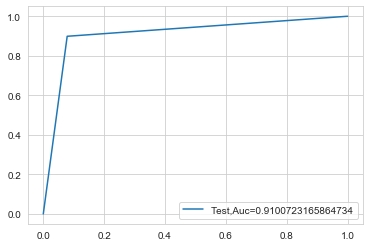

[[78599  6696]
 [   15   133]]


In [82]:
#Fitting the train data
random_lr_ad = random_lr_ad.fit(X_train_ad, y_train_ad)
model_param_lr_ad = random_lr_ad.best_params_
#Fitting the model on train data with the best param values
lr_final_ad = LogisticRegression(penalty='l2',dual=model_param_lr_ad['dual'],C=model_param_lr_ad['C'],
                                 max_iter=model_param_lr_ad['max_iter'])
##Fitting the model on train data with the best param values
lr_final_ad = lr_final_ad.fit(X_train_ad, y_train_ad)
#Predicting value on test data
pred_lr_ad =lr_final_ad.predict(X_test_pt)
cnf_lr_ad=metrics.confusion_matrix(y_test,pred_lr_ad)
print(classification_report(y_test,pred_lr_ad))
accuracy=metrics.accuracy_score(y_test,pred_lr_ad)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_lr_ad)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_lr_ad)

## Decision Trees


In [83]:
#grid for decision trees
param_dist ={
'max_depth': [3, 4,5, 6],
'min_samples_leaf': randint(1,9),
'criterion' : ['gini','entropy']}


In [84]:

#Instantiating the decision Tree Model and Instantiating the RandomizedSearchCV object
dt_ad = DecisionTreeClassifier()
random_dt_ad = RandomizedSearchCV(dt_ad,param_dist,cv=strat,random_state=42)



              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.88      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.90      0.50     85443
weighted avg       1.00      0.92      0.96     85443

Accuracy for the test data 92.2%
ROC for the test data 90.0%


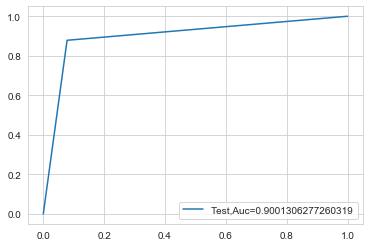

[[78632  6663]
 [   18   130]]


In [85]:
#Fitting the data based on RandomizedSearchCV parameters
random_dt_ad = random_dt_ad.fit(X_train_ad, y_train_ad)
model_param_dt_ad=random_dt_ad.best_params_
#Fitting the data on the best hyperparameter values fetched by RandomizedSearchCV
dt_final_ad = DecisionTreeClassifier(criterion=model_param_dt_ad['criterion'],max_depth= model_param_dt_ad['max_depth'],
                                     min_samples_leaf=model_param_dt_ad['min_samples_leaf'],random_state=42)
#Fitting the data on the best hyperparameter values fetched by RandomizedSearchCV
dt_final_ad = dt_final_ad.fit(X_train_ad, y_train_ad)
#Predicting the values on test data
pred_dt_ad = dt_final_ad.predict(X_test_pt)
cnf_dt_ad=metrics.confusion_matrix(y_test,pred_dt_ad)
print(classification_report(y_test,pred_dt_ad))
accuracy=metrics.accuracy_score(y_test,pred_dt_ad)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_dt_ad)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_dt_ad)

## Random Forest with hyperparameter tuning

In [95]:
#Creating the param distribution grid to be passed in RandomizedSearchCV
param_grid = {
    'max_depth': [3,20,50],
    'min_samples_leaf': [2,6,8],
    'min_samples_split': [2,6,8],
    'n_estimators': [10,100, 200], 
    'max_features': ['auto','sqrt','log2'],
    'bootstrap' : [True,False]
    }

In [96]:
#Instantiating the RandomForestClassifier model
rf_ad = RandomForestClassifier(random_state=42)

In [97]:
#Instantiating the RandomizedSearchCV object
random_rf_ad = RandomizedSearchCV(estimator = rf_ad, param_distributions = param_grid, 
                          cv = strat, n_jobs = -1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.52      0.77      0.62       148

    accuracy                           1.00     85443
   macro avg       0.76      0.88      0.81     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy for the test data 99.8%
ROC for the test data 88.5%


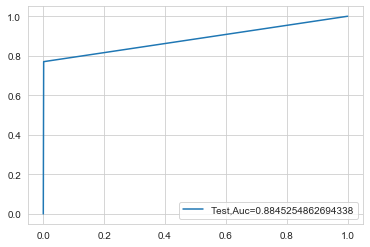

[[85191   104]
 [   34   114]]


In [98]:
#Fitting the model in the train dataset
random_rf_ad = random_rf_ad.fit(X_train_ad, y_train_ad)
model_param_rf_ad = random_rf_ad.best_params_
#Instantiating the RandomForestClassifier Model with the best hyperparameters having the best values
rf_final_ad = RandomForestClassifier(n_estimators= model_param_rf_ad['n_estimators'], min_samples_split=
                                     model_param_rf_ad['min_samples_split'],
                                     min_samples_leaf= model_param_rf_ad['min_samples_leaf'],
                                     max_features=model_param_rf_ad['max_features'], max_depth= model_param_rf_ad['max_depth'],
                                     bootstrap=model_param_rf_ad['bootstrap'],random_state=42)
rf_final_ad = rf_final_ad.fit(X_train_ad, y_train_ad)
#Predicting the values on test data set
pred_rf_ad =rf_final_ad.predict(X_test_pt)
cnf_rf_ad=metrics.confusion_matrix(y_test,pred_rf_ad)
print(classification_report(y_test,pred_rf_ad))
accuracy=metrics.accuracy_score(y_test,pred_rf_ad)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_rf_ad)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_rf_ad)

## XGBoost


In [99]:
#Instantiating the parameters to be passed in param_distributions in RandomizedSearchCV
param_grid = {
 "learning_rate"    : [0.01, 0.1, 0.2, 0.3] ,
 "max_depth"        : [ 3, 4, 6, 8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }


In [100]:
#Instantiating the XGBClassifier Model
xg_ad = xgb.XGBClassifier()
random_xg_ad = RandomizedSearchCV(xg_ad,param_distributions=param_grid,cv=strat,n_jobs=-1,refit=True,random_state=42)


In [101]:
X_test_xg = X_test_pt.values


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.84      0.23       148

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.61     85443
weighted avg       1.00      0.99      0.99     85443

Accuracy for the test data 99.0%
ROC for the test data 91.7%


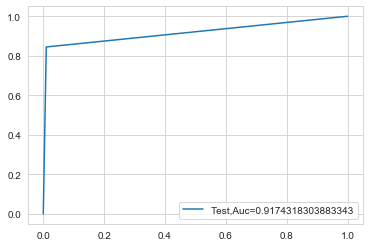

[[84465   830]
 [   23   125]]


In [102]:
#Fitting the model in the train dataset
random_xg_ad = random_xg_ad.fit(X_train_ad, y_train_ad)
model_param_xg_ad = random_xg_ad.best_params_
#Instantiating the XGBoostClassifier Model with the best hyperparameters having the best values
xg_final_ad = xgb.XGBClassifier(min_child_weight=model_param_xg_ad['min_child_weight'] ,
                                max_depth=model_param_xg_ad['max_depth'], learning_rate=model_param_xg_ad['learning_rate'],
                                gamma=model_param_xg_ad['gamma'],colsample_bytree=model_param_xg_ad['colsample_bytree'],
                                random_state=42)
#Fitting the model on train data set
xg_final_ad =xg_final_ad.fit(X_train_ad, y_train_ad)
#Predicting the values on test data set
pred_xg_ad =xg_final_ad.predict(X_test_pt)
cnf_xg_ad=metrics.confusion_matrix(y_test,pred_xg_ad)
print(classification_report(y_test,pred_xg_ad))
accuracy=metrics.accuracy_score(y_test,pred_xg_ad)
print("Accuracy for the test data",'{:.1%}'.format(accuracy))
fpr,tpr,threshold=metrics.roc_curve(y_test,pred_xg_ad)
roc_auc=metrics.auc(fpr,tpr)
print("ROC for the test data",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label='Test,Auc='+str(roc_auc))
plt.legend(loc=4)
plt.show()
print(cnf_xg_ad)





## Comparison of different models

In [111]:
lr_im_metrics=[metrics.accuracy_score(y_test, pred_im_logreg), metrics.precision_score(y_test, pred_im_logreg),
              metrics.recall_score(y_test, pred_im_logreg), metrics.f1_score(
                  y_test, pred_im_logreg),metrics.roc_auc_score(y_test, pred_im_logreg)]

dt_im_metrics = [metrics.accuracy_score(y_test, pred_im_dt), metrics.precision_score(y_test, pred_im_dt),
              metrics.recall_score(y_test, pred_im_dt), metrics.f1_score(
                  y_test, pred_im_dt),
              metrics.roc_auc_score(y_test, pred_im_dt)]
rf_im_metrics = [metrics.accuracy_score(y_test, pred_im_rf), metrics.precision_score(y_test, pred_im_rf),
              metrics.recall_score(y_test, pred_im_rf), metrics.f1_score(
                  y_test, pred_im_rf),
              metrics.roc_auc_score(y_test, pred_im_rf)]
xg_im_metrics = [metrics.accuracy_score(y_test,pred_im_xg), metrics.precision_score(y_test, pred_im_xg),
              metrics.recall_score(y_test,pred_im_xg), metrics.f1_score(
                  y_test,pred_im_xg),
              metrics.roc_auc_score(y_test, pred_im_xg)]

knn_nr_metrics=[metrics.accuracy_score(y_test, pred_knn), metrics.precision_score(y_test, pred_knn),
              metrics.recall_score(y_test, pred_knn), metrics.f1_score(
                  y_test, pred_knn),metrics.roc_auc_score(y_test, pred_knn)]
lr_ru_metrics=[metrics.accuracy_score(y_test, pred_logreg), metrics.precision_score(y_test, pred_logreg),
              metrics.recall_score(y_test, pred_logreg), metrics.f1_score(
                  y_test, pred_logreg),metrics.roc_auc_score(y_test, pred_logreg)]

dt_ru_metrics = [metrics.accuracy_score(y_test, pred_dt), metrics.precision_score(y_test, pred_dt),
              metrics.recall_score(y_test, pred_dt), metrics.f1_score(
                  y_test, pred_dt),
              metrics.roc_auc_score(y_test, pred_dt)]
lr_ru_hy_metrics=[metrics.accuracy_score(y_test, pred_lr_ru), metrics.precision_score(y_test, pred_lr_ru),
              metrics.recall_score(y_test, pred_lr_ru), metrics.f1_score(
                  y_test, pred_lr_ru),metrics.roc_auc_score(y_test, pred_lr_ru)]

dt_ru_hy_metrics = [metrics.accuracy_score(y_test, pred_dt_ru), metrics.precision_score(y_test, pred_dt_ru),
              metrics.recall_score(y_test, pred_dt_ru), metrics.f1_score(
                  y_test, pred_dt_ru),
              metrics.roc_auc_score(y_test, pred_dt)]
rf_ru_hy_metrics = [metrics.accuracy_score(y_test, pred_rf_ru), metrics.precision_score(y_test, pred_rf_ru),
              metrics.recall_score(y_test, pred_rf_ru), metrics.f1_score(
                  y_test, pred_rf_ru),
              metrics.roc_auc_score(y_test, pred_rf_ru)]
xg_ru_hy_metrics = [metrics.accuracy_score(y_test,pred_xg_ru), metrics.precision_score(y_test, pred_xg_ru),
              metrics.recall_score(y_test,pred_xg_ru), metrics.f1_score(
                  y_test,pred_xg_ru),
              metrics.roc_auc_score(y_test, pred_xg_ru)]
lr_sm_metrics=[metrics.accuracy_score(y_test, pred_lr_sm), metrics.precision_score(y_test, pred_lr_sm),
              metrics.recall_score(y_test, pred_lr_sm), metrics.f1_score(
                  y_test, pred_lr_sm),metrics.roc_auc_score(y_test, pred_lr_sm)]

dt_sm_metrics = [metrics.accuracy_score(y_test, pred_dt_sm), metrics.precision_score(y_test, pred_dt_sm),
              metrics.recall_score(y_test, pred_dt_sm), metrics.f1_score(
                  y_test, pred_dt_sm),
              metrics.roc_auc_score(y_test, pred_dt_sm)]
rf_sm_metrics = [metrics.accuracy_score(y_test, pred_rf_sm), metrics.precision_score(y_test, pred_rf_sm),
              metrics.recall_score(y_test, pred_rf_sm), metrics.f1_score(
                  y_test, pred_rf_sm),
              metrics.roc_auc_score(y_test, pred_rf_sm)]
xg_sm_metrics = [metrics.accuracy_score(y_test,pred_xg_sm), metrics.precision_score(y_test, pred_xg_sm),
              metrics.recall_score(y_test,pred_xg_sm), metrics.f1_score(
                  y_test,pred_xg_sm),
              metrics.roc_auc_score(y_test, pred_rf_sm)]
lr_ad_metrics=[metrics.accuracy_score(y_test, pred_lr_ad), metrics.precision_score(y_test,pred_lr_ad),
              metrics.recall_score(y_test, pred_lr_ad), metrics.f1_score(
                  y_test, pred_lr_ad),metrics.roc_auc_score(y_test, pred_lr_ad)]

dt_ad_metrics = [metrics.accuracy_score(y_test, pred_dt_ad), metrics.precision_score(y_test, pred_dt_ad),
              metrics.recall_score(y_test, pred_dt_ad), metrics.f1_score(
                  y_test, pred_dt_ad),
              metrics.roc_auc_score(y_test, pred_dt_ad)]
rf_ad_metrics = [metrics.accuracy_score(y_test, pred_rf_ad), metrics.precision_score(y_test, pred_rf_ad),
              metrics.recall_score(y_test, pred_rf_ad), metrics.f1_score(
                  y_test, pred_rf_ad),
              metrics.roc_auc_score(y_test, pred_rf_ad)]
xg_ad_metrics = [metrics.accuracy_score(y_test,pred_xg_ad), metrics.precision_score(y_test, pred_xg_ad),
              metrics.recall_score(y_test,pred_xg_ad), metrics.f1_score(
                  y_test,pred_xg_ad),
              metrics.roc_auc_score(y_test, pred_xg_ad)]

In [112]:
label = ["Accuracy_score", "Precision_score",
         "Recall_Score", "F1_score", "ROC_AUC_score"]
table = pd.DataFrame({'Logistic Regression Imbalanced': lr_im_metrics,'Decision Tree Imbalanced': dt_im_metrics,
                      'Random Forest Imbalanced': rf_im_metrics, 'Gradient Boosting Imbalanced': xg_im_metrics,
                      'KNN Near Miss':knn_nr_metrics,'Logistic Regression Undersampled': lr_ru_metrics,
                      'Decision Tree Undersampled': dt_ru_metrics,
                      'Logistic Regression Undersampled hyperparameter': lr_ru_hy_metrics,
                      'Decision Tree Undersampled hyperparameter': dt_ru_hy_metrics,
                      'Random Forest Undersampled hyperparameter': rf_ru_hy_metrics, 
                      'Gradient Boosting Undersampled hyperparameter': xg_ru_hy_metrics,
                     'Logistic Regression SMOTE': lr_sm_metrics,'Decision Tree SMOTE': dt_sm_metrics,
                      'Random Forest SMOTE': rf_sm_metrics, 'Gradient Boosting SMOTE': xg_sm_metrics,
                     'Logistic Regression ADASYN': lr_ad_metrics,'Decision Tree ADASYN': dt_ad_metrics,
                      'Random Forest ADASYN': rf_ad_metrics, 'Gradient Boosting ADASYN': xg_ad_metrics})
table = table.transpose()
table.columns = label
table.transpose().round(2)

,Logistic Regression Imbalanced,Decision Tree Imbalanced,Random Forest Imbalanced,Gradient Boosting Imbalanced,KNN Near Miss,Logistic Regression Undersampled,Decision Tree Undersampled,Logistic Regression Undersampled hyperparameter,Decision Tree Undersampled hyperparameter,Random Forest Undersampled hyperparameter,Gradient Boosting Undersampled hyperparameter,Logistic Regression SMOTE,Decision Tree SMOTE,Random Forest SMOTE,Gradient Boosting SMOTE,Logistic Regression ADASYN,Decision Tree ADASYN,Random Forest ADASYN,Gradient Boosting ADASYN
Accuracy_score,1.00,1.00,1.00,1.00,0.93,0.97,0.88,0.97,0.95,0.98,0.97,0.97,0.97,1.00,1.00,0.92,0.92,1.00,0.99
Precision_score,0.85,0.75,0.96,0.94,0.02,0.06,0.01,0.05,0.03,0.08,0.04,0.06,0.05,0.82,0.53,0.02,0.02,0.52,0.13
Recall_Score,0.63,0.66,0.76,0.77,0.87,0.88,0.91,0.89,0.87,0.88,0.88,0.87,0.84,0.78,0.81,0.90,0.88,0.77,0.84
F1_score,0.72,0.70,0.85,0.85,0.04,0.11,0.03,0.09,0.06,0.15,0.08,0.11,0.09,0.80,0.64,0.04,0.04,0.62,0.23
ROC_AUC_score,0.81,0.83,0.88,0.89,0.90,0.93,0.89,0.93,0.89,0.93,0.92,0.92,0.90,0.89,0.89,0.91,0.90,0.88,0.92


We go ahead with Random Forest using Smote, as it gives better f score and recall compared to other models. As it s a banking problem we need to concentrate more on roc score, f score than accuracy

Feature importance of Random Forest SMOTE Model


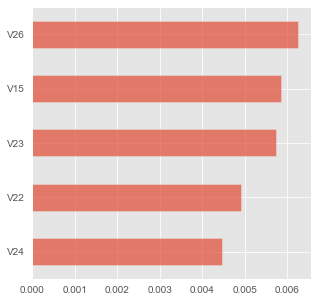

In [113]:
# Check feature importance and display in bar plot.
print('Feature importance of Random Forest SMOTE Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(rf_final_sm.feature_importances_, index=X_train_pt.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('feature.png')